In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [28]:
df= pd.read_csv('Triaxialdata.csv')
df.head()

,Time,Displacement (mm),Load (N),Failure Strain,Failure Area,Deviator Strain
0,0:00:00,-0.75,76.0,0.0,0.000,0.000
1,0:00:10,-0.64,81.0,0.0,1134.115,7.142
2,0:00:20,-0.44,90.0,0.0,1134.115,7.936
3,0:00:30,-0.26,92.0,0.0,1134.115,8.112
4,0:00:40,-0.08,95.0,0.0,1134.115,8.377


In [29]:
# Drop rows with missing values in "Displacement (mm)" and "Load (N)"
df.dropna(subset=["Displacement (mm)", "Load (N)"], inplace=True)

In [30]:
df.head(100)

,Time,Displacement (mm),Load (N),Failure Strain,Failure Area,Deviator Strain
0,0:00:00,-0.75,76.0,0.000000,0.000,0.000
1,0:00:10,-0.64,81.0,0.000000,1134.115,7.142
2,0:00:20,-0.44,90.0,0.000000,1134.115,7.936
3,0:00:30,-0.26,92.0,0.000000,1134.115,8.112
4,0:00:40,-0.08,95.0,0.000000,1134.115,8.377
...,...,...,...,...,...,...
79,0:13:10,13.79,124.0,0.181447,1385.513,8.950
80,0:13:20,13.96,124.0,0.183684,1389.309,8.925
81,0:13:30,14.15,124.0,0.186184,1393.577,8.898
82,0:13:40,14.33,124.0,0.188553,1397.645,8.872


In [31]:
# Convert "Time" column from "HH:MM:SS" format to seconds
def time_to_seconds(time_str):
    h,m,s= map(int, time_str.split(':'))
    sec= h*3600 + m*60 + s
    return sec

In [32]:
df['Time']= df['Time'].apply(time_to_seconds)

In [33]:
df.head(10)

,Time,Displacement (mm),Load (N),Failure Strain,Failure Area,Deviator Strain
0,0,-0.75,76.0,0.000000,0.000,0.000
1,10,-0.64,81.0,0.000000,1134.115,7.142
2,20,-0.44,90.0,0.000000,1134.115,7.936
3,30,-0.26,92.0,0.000000,1134.115,8.112
4,40,-0.08,95.0,0.000000,1134.115,8.377
5,50,0.10,97.0,0.001316,1135.609,8.542
6,60,0.29,97.0,0.003816,1138.459,8.520
7,70,0.46,99.0,0.006053,1141.021,8.676
8,80,0.65,101.0,0.008553,1143.898,8.829
9,90,0.83,101.0,0.010921,1146.637,8.808


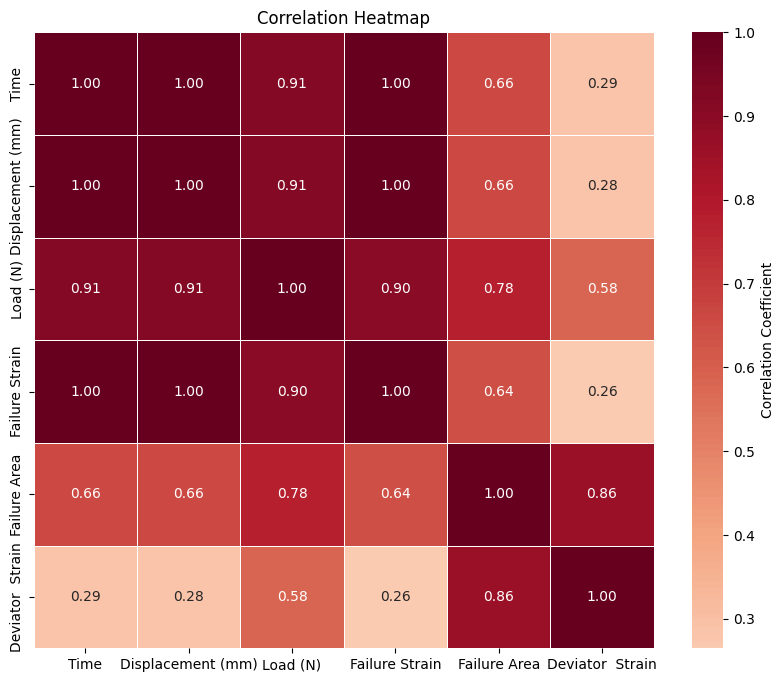

In [34]:
# plot the heatmap
correlation_matrix= df.corr()
plt.figure(figsize= (10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', fmt='.2f', linewidths=0.5, center=0, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap")
plt.show()

In [35]:
# here we can Failure strain is highly correlated with time, displacement and failure area
# Also failure area has some correlataion with time, displacement and failure area
# we will take time, displacement and load as independent variables and others as dependent
X= df[['Time', 'Load (N)', 'Displacement (mm)']]

In [43]:
# Define the dependent variables (targets)
y_failure_strain = df['Failure Strain']
y_failure_area = df['Failure Area']
y_deviator_strain= df['Deviator  Strain']

In [44]:
# Split the data into training and testing sets for each target variable
X_train_strain, X_test_strain, y_train_strain, y_test_strain = train_test_split(X, y_failure_strain, test_size=0.2, random_state=42)
X_train_area, X_test_area, y_train_area, y_test_area = train_test_split(X, y_failure_area, test_size=0.2, random_state=42)
X_train_deviator, X_test_deviator, y_train_deviator, y_test_deviator = train_test_split(X, y_deviator_strain, test_size=0.2, random_state=42)

In [45]:
# Initialize Random Forest Regressors for each target
model_strain = RandomForestRegressor(random_state=42)
model_area = RandomForestRegressor(random_state=42)
model_deviator = RandomForestRegressor(random_state=42)

In [46]:
# Train the models
model_strain.fit(X_train_strain, y_train_strain)
model_area.fit(X_train_area, y_train_area)
model_deviator.fit(X_train_deviator, y_train_deviator)

RandomForestRegressor(random_state=42)

In [47]:
# Predict on the test sets
y_pred_strain = model_strain.predict(X_test_strain)
y_pred_area = model_area.predict(X_test_area)
y_pred_deviator = model_deviator.predict(X_test_deviator)

In [48]:
# Evalauting models
mae_strain= mean_absolute_error(y_test_strain, y_pred_strain)
r2_strain= r2_score(y_test_strain, y_pred_strain)

mae_area = mean_absolute_error(y_test_area, y_pred_area)
r2_area = r2_score(y_test_area, y_pred_area)

mae_deviator = mean_absolute_error(y_test_deviator, y_pred_deviator)
r2_deviator = r2_score(y_test_deviator, y_pred_deviator)

In [49]:
# Display results
print("Failure Strain Prediction - Mean Absolute Error (MAE):", mae_strain, "R-squared (R²):", r2_strain)
print("Failure Area Prediction - Mean Absolute Error (MAE):", mae_area, "R-squared (R²):", r2_area)
print("Deviator Strain Prediction - Mean Absolute Error (MAE):", mae_deviator, "R-squared (R²):", r2_deviator)

Failure Strain Prediction - Mean Absolute Error (MAE): 0.0010316559647058862 R-squared (R²): 0.9994877531182238
Failure Area Prediction - Mean Absolute Error (MAE): 68.2454347058823 R-squared (R²): 0.1859916547029522
Deviator Strain Prediction - Mean Absolute Error (MAE): 0.4988523529411757 R-squared (R²): 0.2723229213718422
